In [1]:
import matplotlib.pyplot as plt
import numpy as np

In the following, we work in a $(z,y)$ axis system, as in figure 5.1.

In [465]:
#Constants:

c=3*10**8 #Speed of light in m.s^{-1}
me=5.11*10**-4 #Mass of the electron in GeV/c²

#Parameters:

q=-0.3 #for a particle with a charge 1.6*10**-19 C
B=0.001 #Magnetic field in T
L=0.01 #length of the magnetic zone, in m
d=0.005 #length of the dectectors


d1=0.005 #distance between the particle gun and the first sensor
d2=0.005 #distance bewteen the second sensor and the magnetic zone
d3=0.007 #distance between the magnetic zone and the third sensor

Let's define the system such that the particle come from the right to left, as in the figure.

In [466]:
#Initial position:

z0=0.1
y0=0.1

#Initial momentum in GeV/c:

p_z0=-3
p_y0=0

#Initial velocities in c:

v_z0=p_z0/me
v_y0=p_y0/me

Now we need to introduce the kinematic of the particle in the B-field.

In [467]:
def Kinematic_B_Field(z,y):
    "Arguments: (z,y), the position at the entrance of the magnetic zone"
    "Return: lists of the positions of the particle at each instant"
    
    dt=0.0000001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    v=0 #Velocity
    g=0 #Inverse Lorentz coefficient
    
    #Implementation of the initial conditions:
    Z.append(z)
    Y.append(y)
    Vz.append(v_z0)
    Vy.append(v_y0)
    
    i=0 #Index
    
    while Z[i]>Z[0]-L: #While the particle is inside the magnetic zone
        #Computation of v and g
        v=np.sqrt(Vz[i]**2+Vy[i]**2)
        g=np.sqrt(1-(v/c)**2)
        
        #Computation of the coordinates of the velocity
        Vz.append(Vz[i]+q*B*g*Vy[i])
        Vy.append(Vy[i]-q*B*g*Vz[i])
        
        #Computation of the positions
        Z.append(Z[i]+Vz[i]*dt)
        Y.append(Y[i]+Vy[i]*dt)
        
        i=i+1
        
    return (Z,Y,Vz,Vy,i)

In [468]:
def plot_Kinematic_B_Field(z,y):
    Z,Y,Vz,Vy=[],[],[],[]
    j=0
    
    Z,Y,Vz,Vy,j=Kinematic_B_Field(z,y)
    plt.plot(Z,Y)
    plt.show

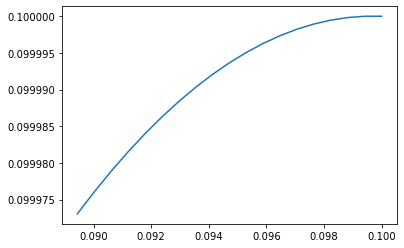

In [469]:
plot_Kinematic_B_Field(z0,y0)

In [470]:
def Tracker():
    "Arguments:"
    "Return: Lists of positions during the whole experiment"
    
    dt=0.000001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    Z1,Y1,Vz1,Vy1=[],[],[],[] #Lists of positions and velocities in the first zone
    
    ZB,YB,VzB,VyB=[],[],[],[] #Lists of positions and velocities in the magnetic field
    
    #Implementation of the initial conditions:
    Z1.append(z0)
    Y1.append(y0)
    Vz1.append(v_z0)
    Vy1.append(v_y0)
    
    i=0 #Index
    
    #First zone(particle gun --> beginning magnetic zone):
    while Z1[i]>(d1+d+d2+L+d3+d): 
        Z1.append(Z1[i]+Vz1[0]*dt)
        Y1.append(Y1[i]+Vy1[0]*dt)
        
        i=i+1
        
    #Second zone(magnetic zone):
    j=0 #Last index used in the Kinematic_B_Field function
    ZB,YB,VzB,VyB,j=Kinematic_B_Field(Z1[i],Y1[i])
    
    #Concatenation:
    Z=Z1+ZB
    Y=Y1+YB
    Vz=Vz1+VzB
    Vy=Vy1+VyB
    
    i=i+j
    
    #Third Zone(magnetic zone --> end, when y=0)
    k=0
    while Z[i]>0:
        Z.append(Z[i]+Vz[j]*dt)
        Y.append(Y[i]+Vy[j]*dt)
        
        if Z[i]==d3:
            k=i
        
        i=i+1
        
    return (Z,Y,Vz,Vy,k,j)

In [471]:
def plot_Kinematic():
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    plt.plot(Z,Y)
    plt.show

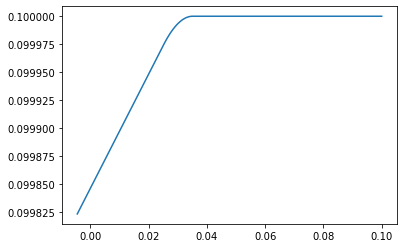

In [472]:
plot_Kinematic()

In [473]:
def reconstruction():
    "Arguments:"
    "Return: the momentum of the particle"
    
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    
    alpha=0
    p=0
    
    #Computation
    alpha=np.arctan((Y[len(Y)-1]-Y[k])/(Z[len(Z)-1]-Z[k]))
    p=q*np.abs(B)*L/np.sin(alpha)
    
    return (p)

In [474]:
reconstruction()

-0.0017746775757508022

In [475]:
def verification():
    "Arguments:"
    "Return: the error on the reconstruction"
    
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    p,eps=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    
    v=np.sqrt(Vz[j]**2+Vy[j]**2)
    gamma=1/np.sqrt(1-(v/c)**2)
    
    pt=np.sqrt(p_z0**2+p_y0**2)
    p=reconstruction()
    eps=(np.abs(pt-p)/pt)*100
    
    return(pt,eps)

In [476]:
verification()

(3.0, 100.0591559191917)